### This notebook is to plot hysteresis patterns for all 7 of my summer storms

Import all data -  Constituents, water surface elevation (WSE) and sonde turbidity and fDOM to plot hysteresis

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# directories where the CSV files are stored
storm_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms'
sonde_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/sonde'
WSE_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/WSE'

# dictionaries to store the data frames
storms = {}
sondes = {}
WSE = {}

# iterate over all files in the directory
# storms:
for filename in os.listdir(storm_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(storm_directory, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date/Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date/Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index   
        df = df.drop(columns=['Date/Time', 'WSE', 'Q', ])   # drop the original date 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        storms[key] = df                                    # store the data frame in the dictionary

# sondes:
for filename in os.listdir(sonde_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(sonde_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])
        df['Date_Time'] = pd.to_datetime(df['Date (MM/DD/YYYY)'] + ' ' + df['Time (HH:mm:ss)'])
        df['Date_Time'] = df['Date_Time'].dt.round('min')  # round to the nearest minute
        df = df.drop(columns=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])  # drop the original date and time columns
        df = df.set_index('Date_Time')                                  # set date time as the index
        df = df.dropna(how='all', axis=1)                               # drop columns where all values are NaN
        key = filename[:-4]
        sondes[key] = df

# WSE:
for filename in os.listdir(WSE_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(WSE_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date_Time'])
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        df = df.resample('1T').interpolate()                # resampling with a 1 min interval
        key = filename[:-4]
        WSE[key] = df

In [2]:
storms.keys()

dict_keys(['st1_down', 'st1_up', 'st2_down', 'st3_down', 'st4_down', 'st4_up', 'st5_down', 'st5_up', 'st6_up', 'st7_down', 'st7_up'])

Cleanup the data - First, I need to add the water depth to each dataframe where they match and convert the WSEs to actual depths

In [3]:
# 2021
WSE['WSE_2021']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2021']['P2C']))* 100 # top elev - WSE = depth, in cm
WSE['WSE_2021']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2021']['P3C']))* 100 
# 2022
WSE['WSE_2022']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2022']['P2C']))* 100 
WSE['WSE_2022']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2022']['P3C']))* 100 
# 2023
WSE['WSE_2023']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2023']['P2C']))* 100 
WSE['WSE_2023']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2023']['P3C']))* 100 

Will also need to calculate the average depth in order to have one measure of water depth

In [4]:
# 2021
WSE['WSE_2021']['depth'] = np.average(WSE['WSE_2021'][['P2C_depth', 'P3C_depth']], axis=1)
# 2022 
WSE['WSE_2022']['depth'] = np.average(WSE['WSE_2022'][['P2C_depth', 'P3C_depth']], axis=1)
# 2023
WSE['WSE_2023']['depth'] = np.average(WSE['WSE_2023'][['P2C_depth', 'P3C_depth']], axis=1)

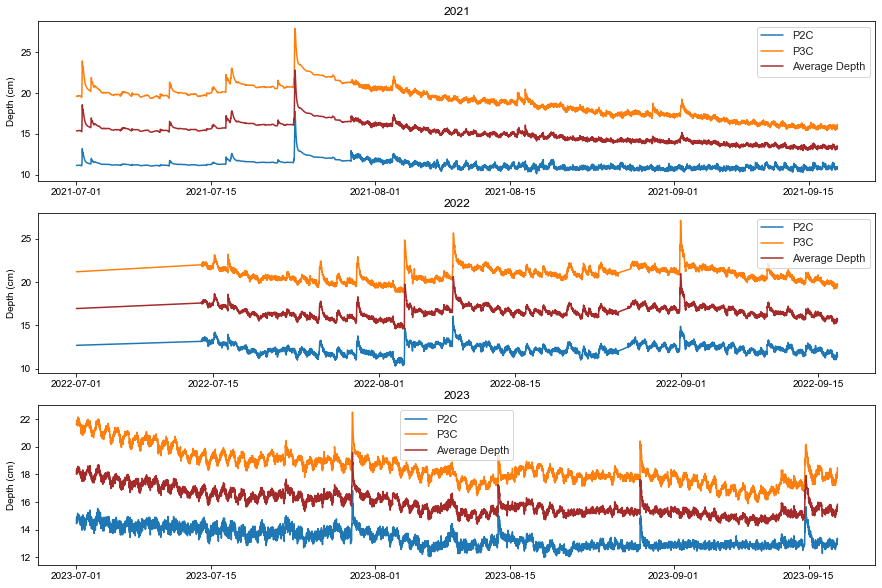

In [5]:
# plot depth time series for each year 
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False)
sns.set_theme(style="whitegrid")

# filter for summer months
summer2021 = WSE['WSE_2021'][WSE['WSE_2021'].index.month.isin([7, 8, 9])]
summer2022 = WSE['WSE_2022'][WSE['WSE_2022'].index.month.isin([7, 8, 9])]
summer2023 = WSE['WSE_2023'][WSE['WSE_2023'].index.month.isin([7, 8, 9])]

ax[0].plot(summer2021.index, summer2021['P2C_depth'], label='P2C')
ax[0].plot(summer2021.index, summer2021['P3C_depth'], label='P3C')
ax[0].plot(summer2021.index, summer2021['depth'], label='Average Depth', color='brown')
ax[0].set_title('2021')
ax[0].set_ylabel('Depth (cm)')
ax[0].legend()

ax[1].plot(summer2022.index, summer2022['P2C_depth'], label='P2C')
ax[1].plot(summer2022.index, summer2022['P3C_depth'], label='P3C')
ax[1].plot(summer2022.index, summer2022['depth'], label='Average Depth', color='brown')
ax[1].set_title('2022')
ax[1].set_ylabel('Depth (cm)')
ax[1].legend()

ax[2].plot(summer2023.index, summer2023['P2C_depth'], label='P2C')
ax[2].plot(summer2023.index, summer2023['P3C_depth'], label='P3C')
ax[2].plot(summer2023.index, summer2023['depth'], label='Average Depth', color='brown')
ax[2].set_title('2023')
ax[2].set_ylabel('Depth (cm)')
ax[2].legend()

plt.show()

In [6]:
# merge the dataframes on the index - need to make sure storms coincide with the year of the WSE data!

# downstream reach
storms['st1_down'] = storms['st1_down'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
sondes['st1_down_sonde'] = sondes['st1_down_sonde'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st2_down'] = storms['st2_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
sondes['st2_down_sonde'] = sondes['st2_down_sonde'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st3_down'] = storms['st3_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
sondes['st3_down_sonde'] = sondes['st3_down_sonde'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st4_down'] = storms['st4_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st4_down_sonde'] = sondes['st4_down_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_down'] = storms['st5_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st5_down_sonde'] = sondes['st5_down_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st6_down_sonde'] = sondes['st6_down_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_down'] = storms['st7_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
# upstream reach
storms['st1_up'] = storms['st1_up'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
sondes['st1_up_sonde'] = sondes['st1_up_sonde'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st4_up'] = storms['st4_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st4_up_sonde'] = sondes['st4_up_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_up'] = storms['st5_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st6_up'] = storms['st6_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_up'] = storms['st7_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st7_up_sonde'] = sondes['st7_up_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')

In [7]:
storms['st4_down']

,SS (uL/L),DOC (mg/L),POC (mg/L),N (mg/L),LAB ID,fDOM,Turbidity,P2C,P3C,P2C_depth,P3C_depth,depth
Date_Time,,,,,,,,,,,,
2023-07-29 14:52:00,NaN,NaN,29.943,5.810,439,20.000,31.82,2723.167515,2724.204013,15.851460,21.601333,18.726397
2023-07-29 15:07:00,223.614,3.128,9.573,1.954,440,21.212,36.38,2723.171948,2724.210200,16.294813,22.220000,19.257407
2023-07-29 15:22:00,200.690,3.553,6.934,1.808,441,23.934,34.87,2723.171871,2724.211553,16.287087,22.355333,19.321210
2023-07-29 15:37:00,231.914,3.926,7.483,5.852,442,26.282,33.26,2723.174663,2724.212587,16.566320,22.458667,19.512493
2023-07-29 15:52:00,233.253,4.148,5.926,1.819,443,29.050,26.35,2723.173341,2724.211160,16.434093,22.316000,19.375047
2023-07-29 16:07:00,124.560,4.571,8.285,2.074,444,31.362,20.14,2723.166812,2724.208847,15.781160,22.084667,18.932913
2023-07-29 16:22:00,NaN,5.150,10.349,0.712,445,32.674,16.76,2723.165955,2724.206740,15.695487,21.874000,18.784743


Defining Functions - These are the functions I am going to be calling to plot my hysteresis patters

In [8]:
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    # Ensure z is a 1D array with the same length as x and y
    if z is None:
        z = np.arange(len(x))  # Use the index of the point as the color
    elif not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z] * len(x))
    else:
        z = np.asarray(z)

    # Remove NaN values
    mask = ~np.isnan(y)
    x, y = x[mask], y[mask]

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    ax = plt.gca()
    ax.add_collection(lc)

    return lc

# Storm Hysteresis Plots

Storm 1 - Downstream

In [ ]:
# single plot - downstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['depth']))
    num_points = len(storms['st1_down']['depth'])
    colorline(storms['st1_down']['depth'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['depth'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # Close the figure to free up memory

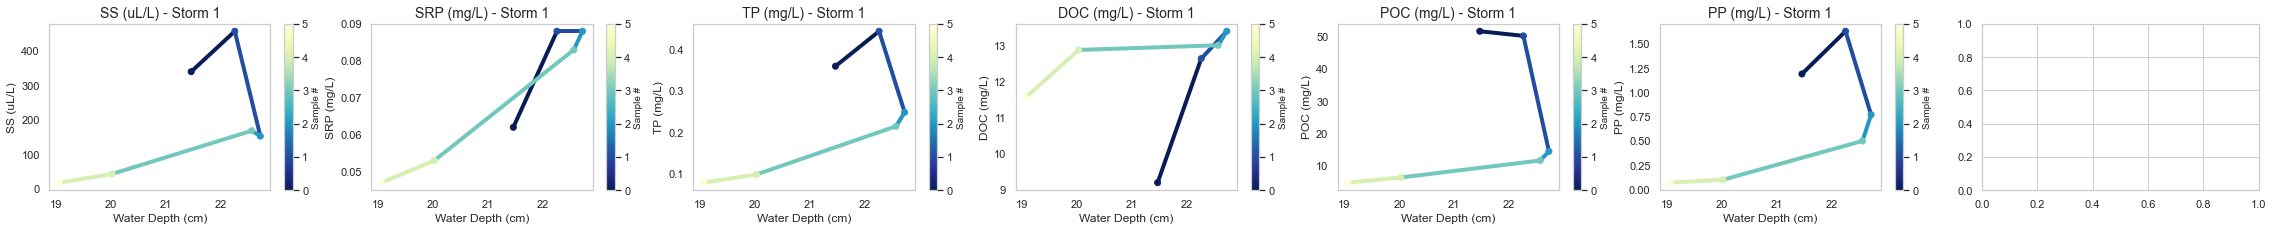

In [10]:
# All constituents - downstream - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['depth']))
    num_points = len(storms['st1_down']['depth'])
    colorline(storms['st1_down']['depth'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['depth'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 1 - Upstream

In [ ]:
# single plot - upstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['depth']))
    num_points = len(storms['st1_up']['depth'])
    colorline(storms['st1_up']['depth'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['depth'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

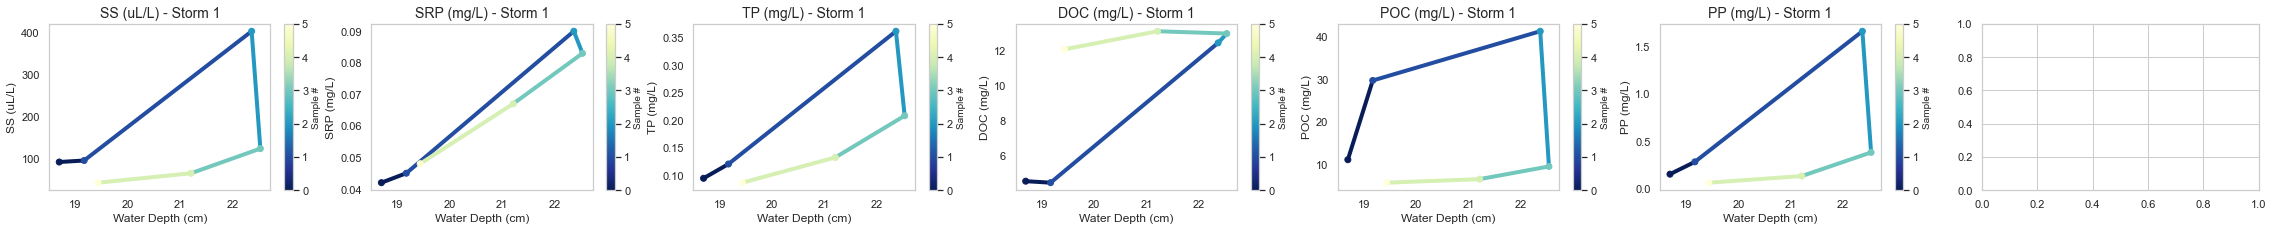

In [12]:
# All constituents - downstream - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['depth']))
    num_points = len(storms['st1_up']['depth'])
    colorline(storms['st1_up']['depth'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['depth'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 2 - Downstream

In [ ]:
# single plot - downstream reach - storm 2
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st2_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st2_down'][constituent])
    x = storms['st2_down']['depth'][mask]
    y = storms['st2_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 2', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

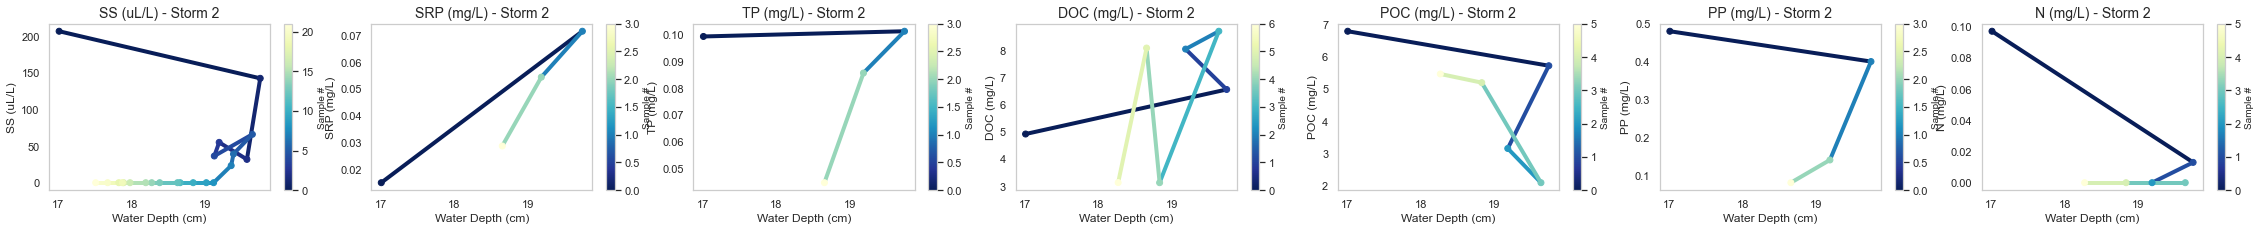

In [14]:
# All constituents - downstream - storm 2
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st2_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st2_down'][constituent])
    x = storms['st2_down']['depth'][mask]
    y = storms['st2_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 2', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 3 - Downstream

In [ ]:
# single plot - downstream reach - storm 3
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st3_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st3_down'][constituent])
    x = storms['st3_down']['depth'][mask]
    y = storms['st3_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 3', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

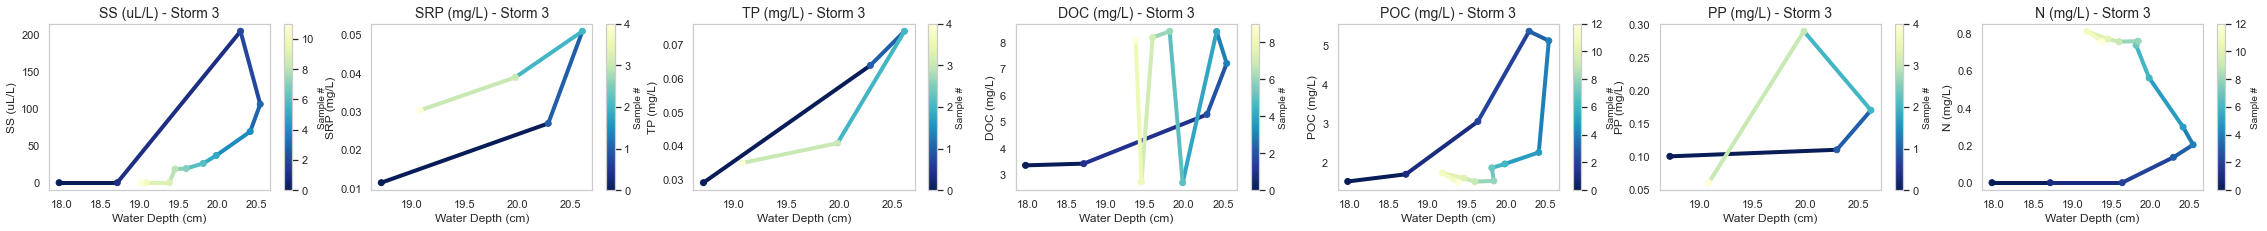

In [16]:
# All constituents - downstream - storm 3
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st3_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st3_down'][constituent])
    x = storms['st3_down']['depth'][mask]
    y = storms['st3_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 3', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 4 - Downstream

In [ ]:
# single plot - downstream reach - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_down'][constituent])
    x = storms['st4_down']['depth'][mask]
    y = storms['st4_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

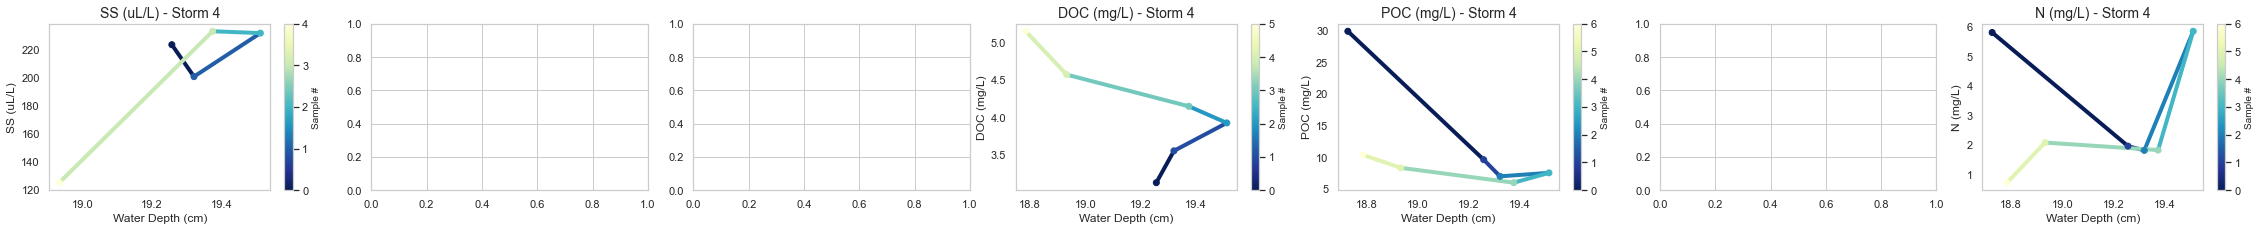

In [18]:
# All constituents - downstream - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st4_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st4_down'][constituent])
    x = storms['st4_down']['depth'][mask]
    y = storms['st4_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 4', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 4 - Upstream

In [ ]:
# single plot - upstream reach - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['depth'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

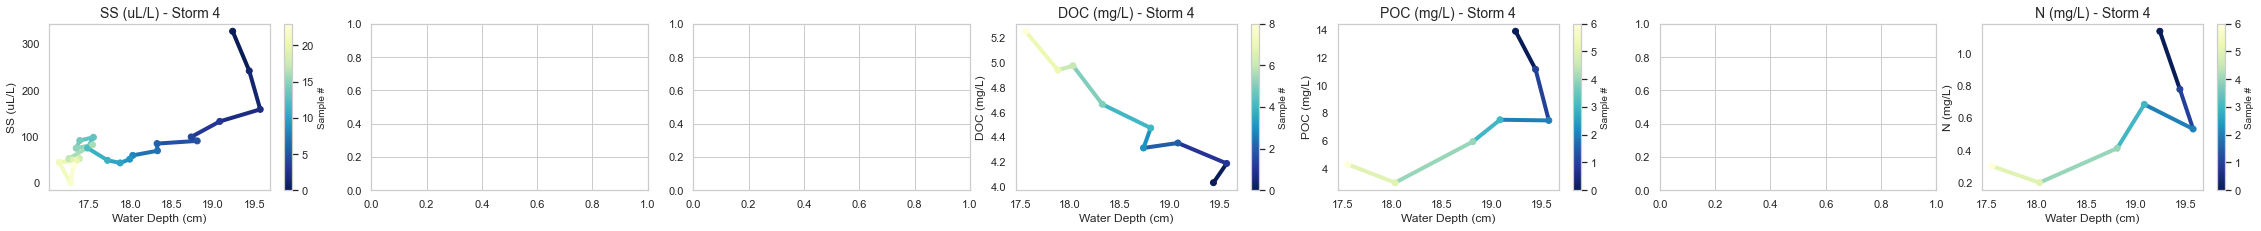

In [20]:
# All constituents - upstream - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st4_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['depth'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 4', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 5 - Downstream

In [21]:
storms['st5_down']

,SS (uL/L),DOC (mg/L),POC (mg/L),N (mg/L),LAB ID,fDOM,Turbidity,P2C,P3C,P2C_depth,P3C_depth,depth
Date_Time,,,,,,,,,,,,
2023-08-13 18:45:00,210.458,4.473,7.778,1.035,456.0,26.750,22.840,2723.160243,2724.182200,15.124300,19.420000,17.27215
2023-08-13 18:58:00,116.066,3.936,4.535,0.865,457.0,28.572,15.560,2723.159733,2724.179167,15.073253,19.116667,17.09496
2023-08-13 19:02:00,113.258,3.943,5.889,1.832,458.0,28.868,13.776,2723.158800,2724.178700,14.979960,19.070000,17.02498
2023-08-13 19:10:00,81.150,4.039,4.804,0.835,459.0,29.220,11.310,2723.155382,2724.178700,14.638200,19.070000,16.85410
2023-08-13 21:02:00,56.150,2.786,2.921,0.234,460.0,22.616,8.756,2723.158105,2724.181300,14.910480,19.330000,17.12024


In [ ]:
# single plot - downstream reach - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_down'][constituent])
    x = storms['st5_down']['depth'][mask]
    y = storms['st5_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

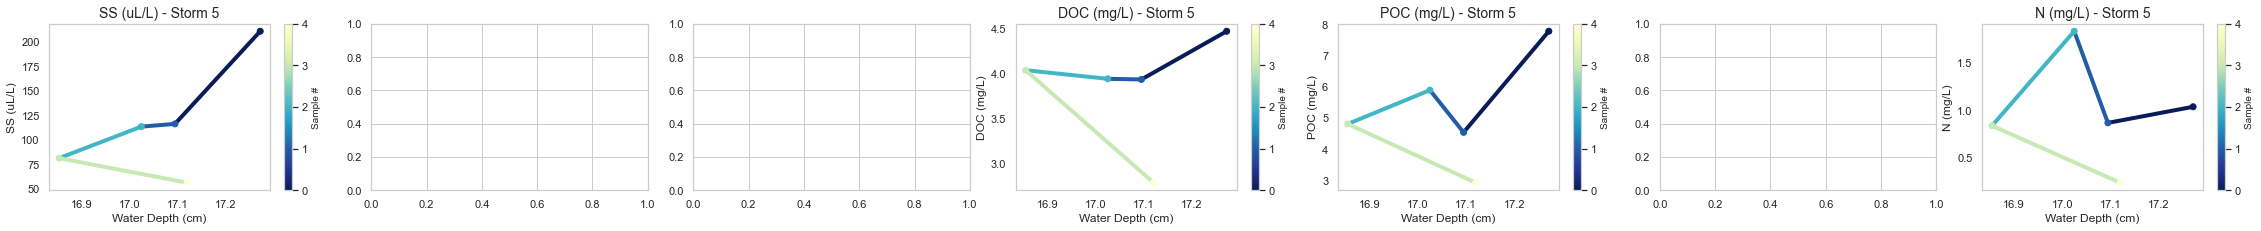

In [23]:
# All constituents - downstream - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st5_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st5_down'][constituent])
    x = storms['st5_down']['depth'][mask]
    y = storms['st5_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 5', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 5 - Upstream

In [ ]:
# single plot - upstream reach - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_up'][constituent])
    x = storms['st5_up']['depth'][mask]
    y = storms['st5_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

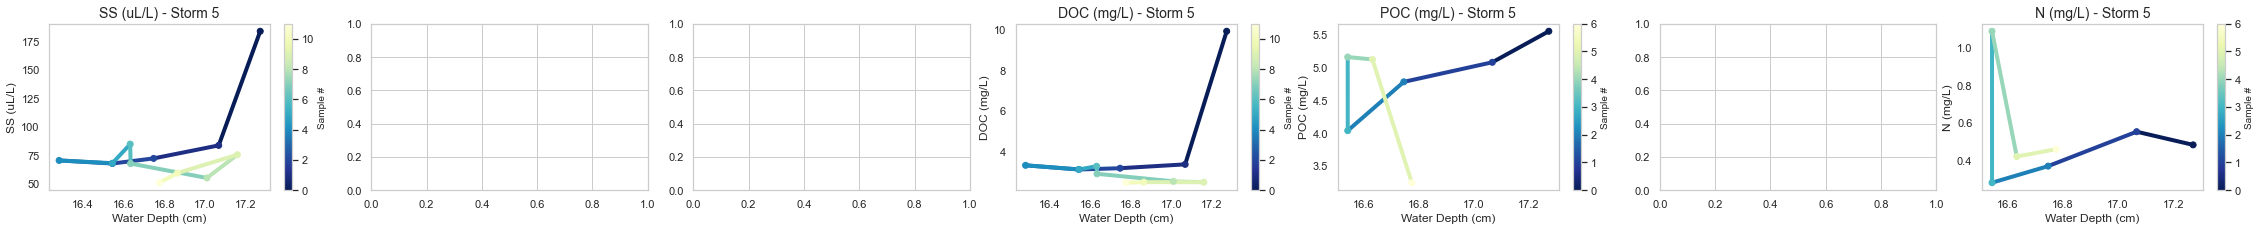

In [25]:
# All constituents - upstream - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st5_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st5_up'][constituent])
    x = storms['st5_up']['depth'][mask]
    y = storms['st5_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 5', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 6 - Upstream

In [ ]:
# single plot - upstream reach - storm 6
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st6_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st6_up'][constituent])
    x = storms['st6_up']['depth'][mask]
    y = storms['st6_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 6', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

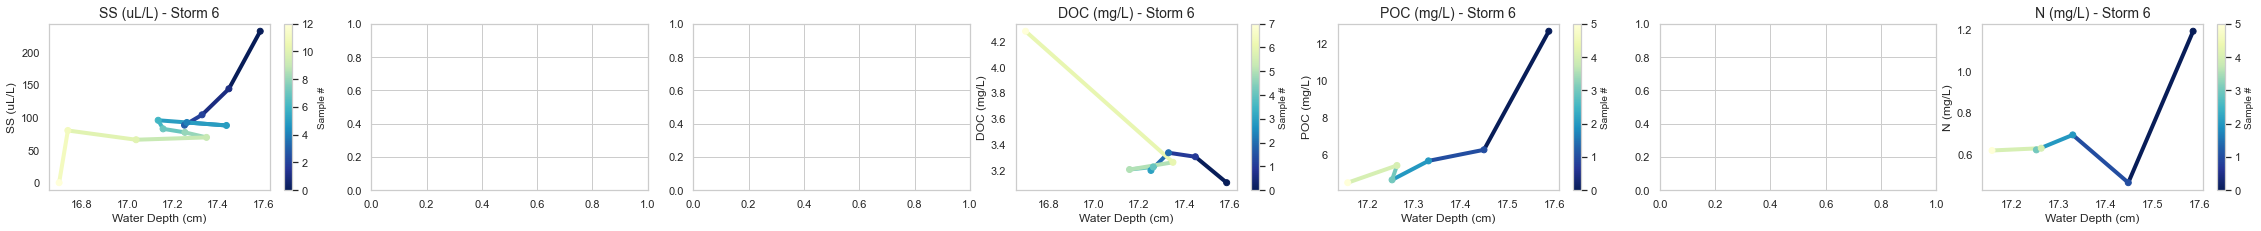

In [27]:
# All constituents - upstream - storm 6
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st6_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st6_up'][constituent])
    x = storms['st6_up']['depth'][mask]
    y = storms['st6_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 6', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 7 - Downstream

In [ ]:
# single plot - downstream reach - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st7_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st7_down'][constituent])
    x = storms['st7_down']['depth'][mask]
    y = storms['st7_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 7', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

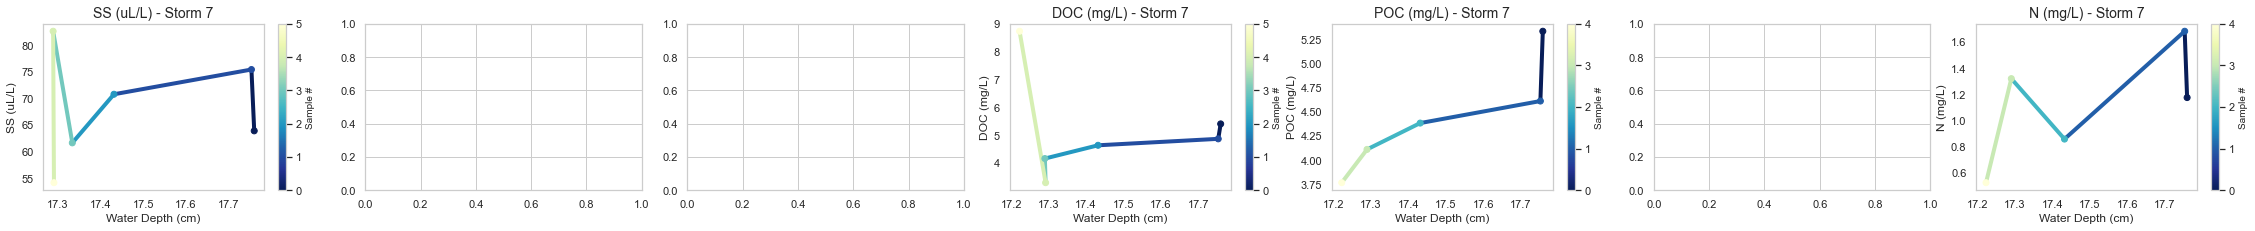

In [29]:
# All constituents - downstream - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st7_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st7_down'][constituent])
    x = storms['st7_down']['depth'][mask]
    y = storms['st7_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 7', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 7 - Upstream

In [ ]:
# single plot - upstream reach - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st7_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st7_up'][constituent])
    x = storms['st7_up']['depth'][mask]
    y = storms['st7_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 7', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

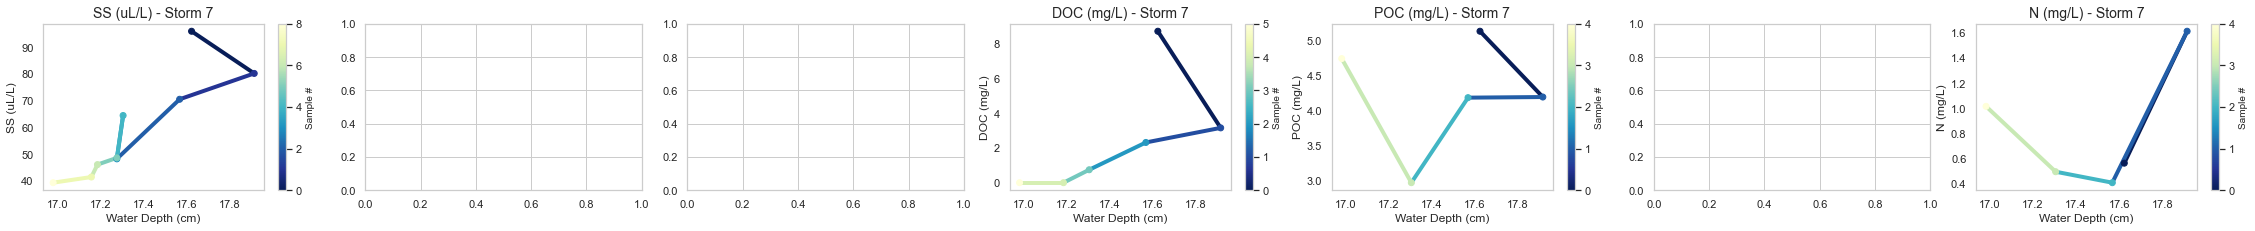

In [31]:
# All constituents - upstream - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st7_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st7_up'][constituent])
    x = storms['st7_up']['depth'][mask]
    y = storms['st7_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 7', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

# Storm Hydrographs & Hysteresis - From Sondes 

Storm 1 - Downstream

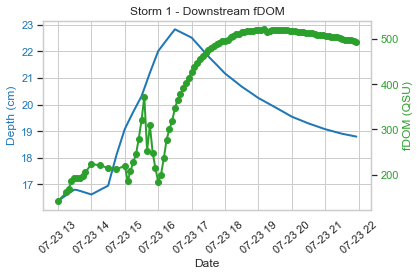

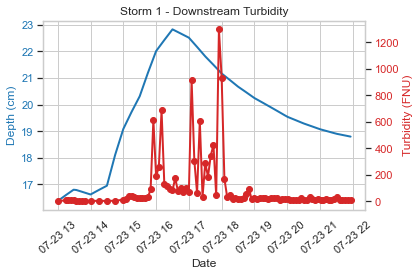

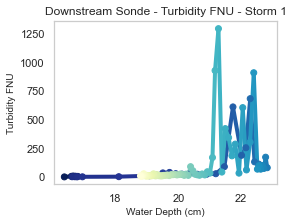

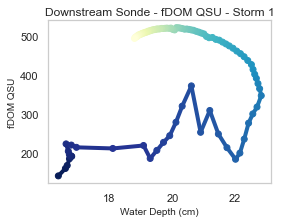

In [32]:
# Define the date range
start_date = '2021-07-23 13:00:00'
end_date = '2021-07-23 22:00:00'
sonde_data = sondes['st1_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 1', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

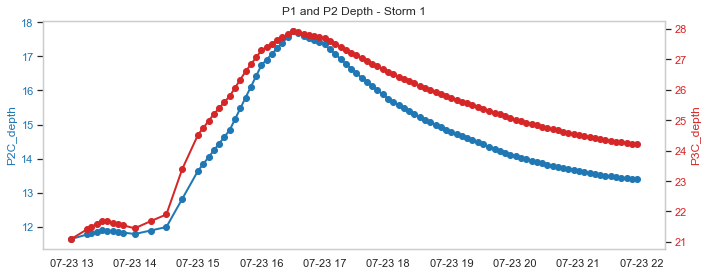

Time lag between P2C_depth and depth peaks:  0 days 00:00:00


In [33]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 1')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and depth peaks: ", time_lag)

Storm 1 - Upstream

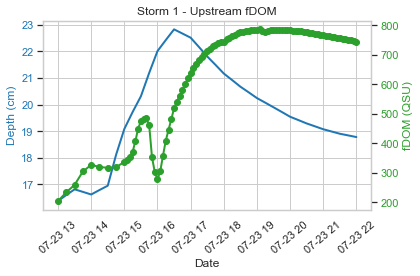

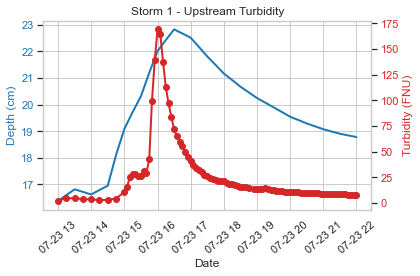

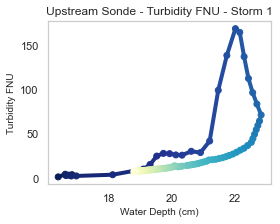

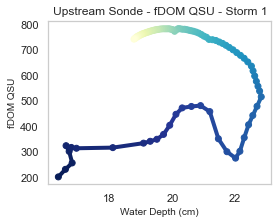

In [34]:
# Define the date range
start_date = '2021-07-23 13:00:00'
end_date = '2021-07-23 22:00:00'
sonde_data = sondes['st1_up_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Upstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_fdom_up_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Upstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_turbidity_up_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Upstream Sonde - {constituent} - Storm 1', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

Storm 2 - Downstream

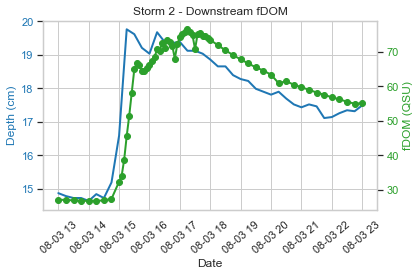

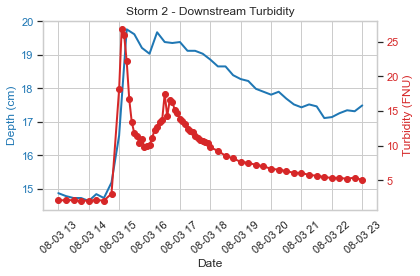

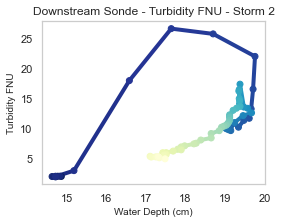

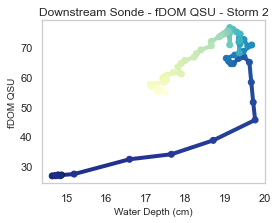

In [35]:
# Define the date range
start_date = '2022-08-03 13:00:00'
end_date = '2022-08-03 23:00:00'
sonde_data = sondes['st2_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 2 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/st2_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 2 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/st2_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 2', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

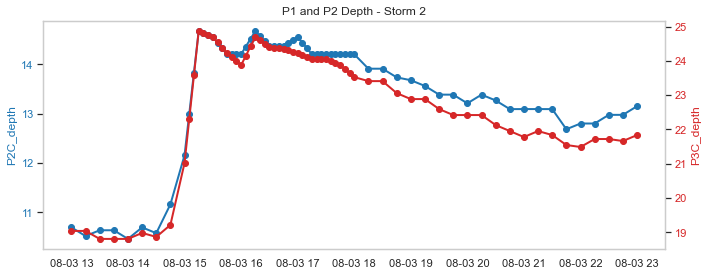

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:00:00


In [36]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 2')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 3 - Downstream

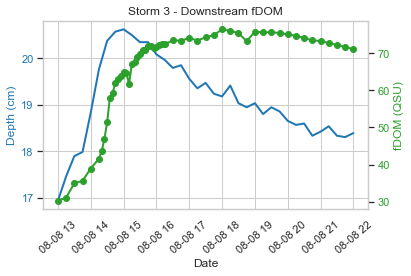

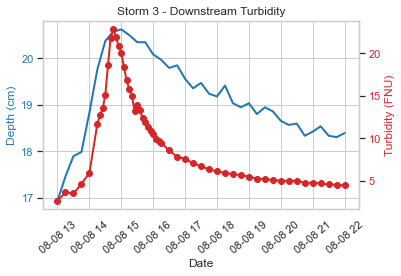

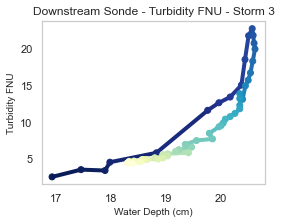

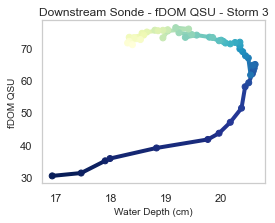

In [49]:
# Define the date range
start_date = '2022-08-08 13:00:00'
end_date = '2022-08-08 22:00:00'
sonde_data = sondes['st3_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 3 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/st3_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 3 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/st3_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 3', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

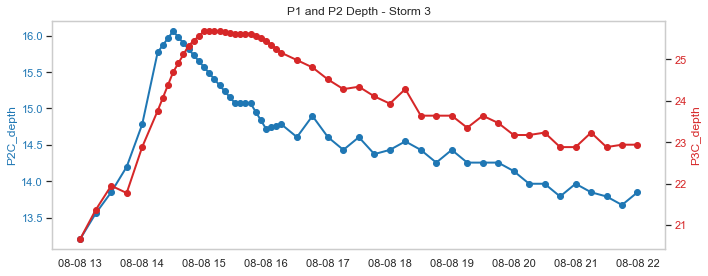

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:30:00


In [50]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 3')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

In [51]:
print("Time of P2C_depth peak: ", peak_P2C)
print("Time of P3C_depth peak: ", peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Time of P2C_depth peak:  2022-08-08 14:30:00
Time of P3C_depth peak:  2022-08-08 15:00:00
Time lag between P2C_depth and P3C_depth peaks:  0 days 00:30:00


Storm 4 - Downstream

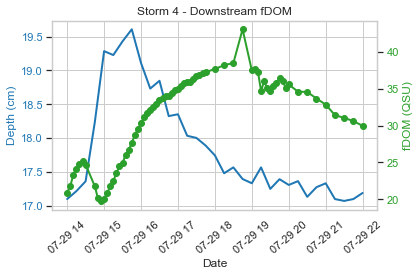

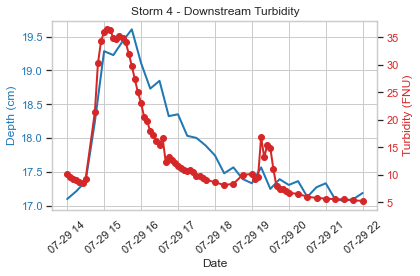

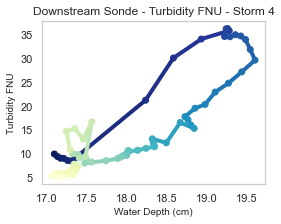

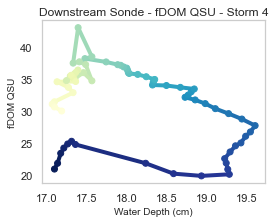

In [39]:
# Define the date range
start_date = '2023-07-29 13:00:00'
end_date = '2023-07-29 22:00:00'
sonde_data = sondes['st4_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 4', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

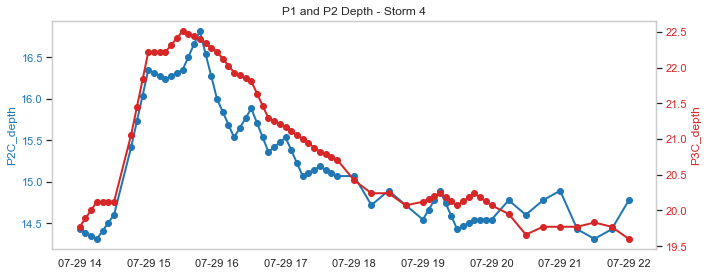

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:15:00


In [40]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 4')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 4 - Upstream

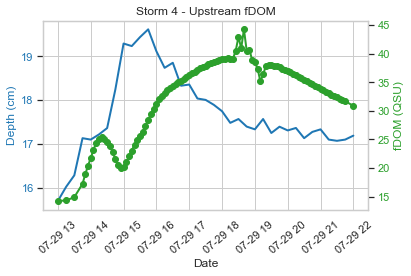

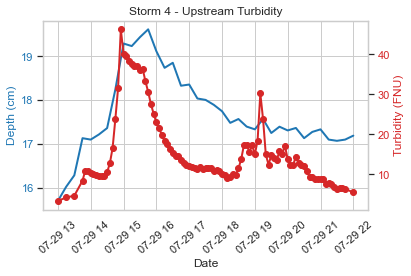

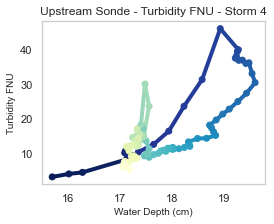

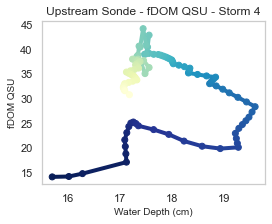

In [41]:
# Define the date range
start_date = '2023-07-29 13:00:00'
end_date = '2023-07-29 22:00:00'
sonde_data = sondes['st4_up_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Upstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_fdom_up_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Upstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_turbidity_up_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Upstream Sonde - {constituent} - Storm 4', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

Storm 5 - Downstream

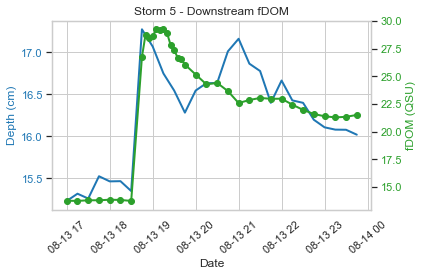

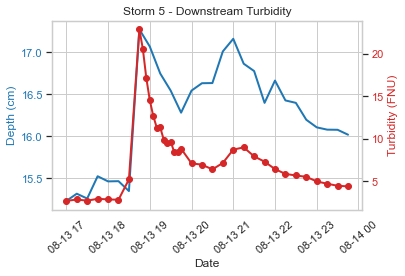

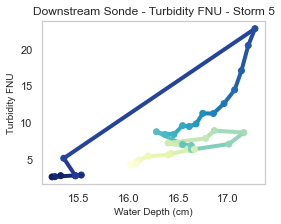

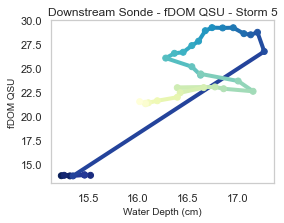

In [42]:
# Define the date range
start_date = '2023-08-13 17:00:00'
end_date = '2023-08-14 3:00:00'
sonde_data = sondes['st5_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 5 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/st5_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 5 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/st5_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 5', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

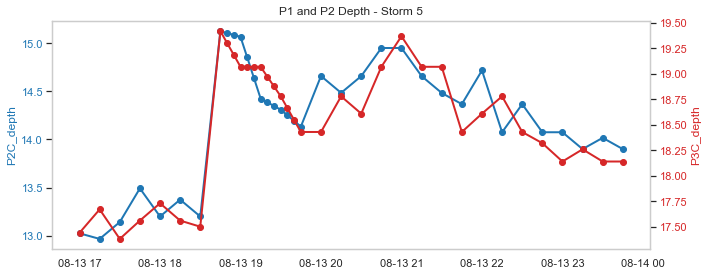

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:00:00


In [43]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 5')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 6 - Downstream

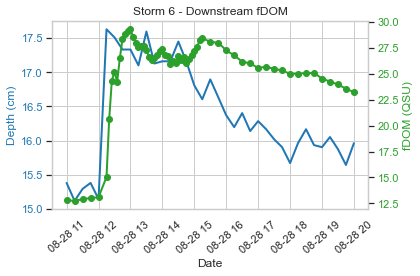

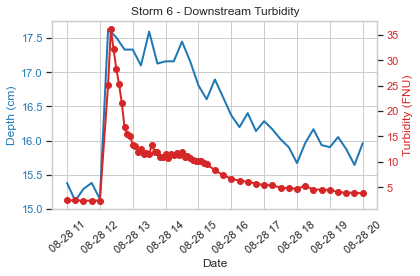

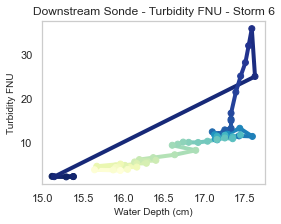

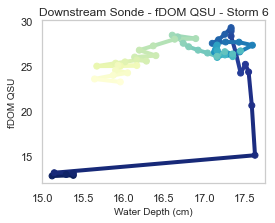

In [44]:
# Define the date range
start_date = '2023-08-28 11:00:00'
end_date = '2023-08-28 20:00:00'
sonde_data = sondes['st6_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 6 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/st6_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 6 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/st6_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 6', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

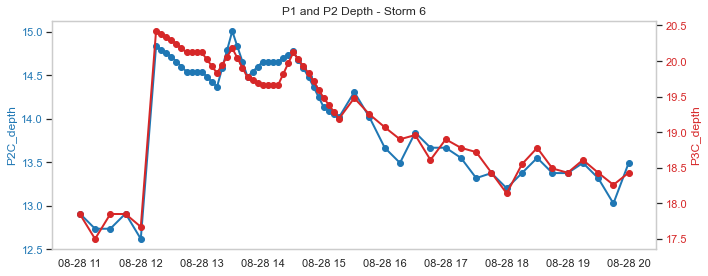

Time lag between P2C_depth and P3C_depth peaks:  0 days 01:15:00


In [45]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 6')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 7 - Upstream

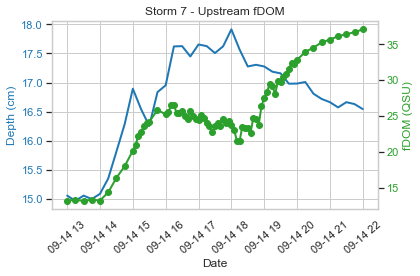

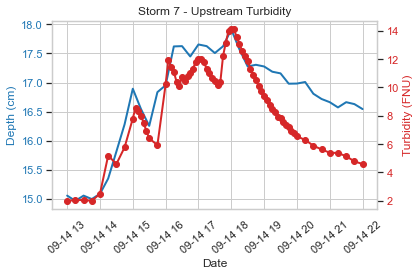

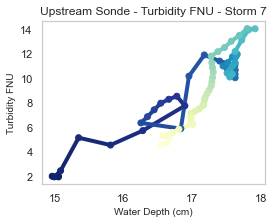

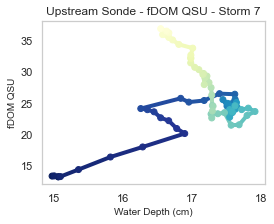

In [46]:
# Define the date range
start_date = '2023-09-14 13:00:00'
end_date = '2023-09-14 22:00:00'
sonde_data = sondes['st7_up_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 7 - Upstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/st7_fdom_up_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 7 - Upstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/st7_turbidity_up_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Upstream Sonde - {constituent} - Storm 7', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

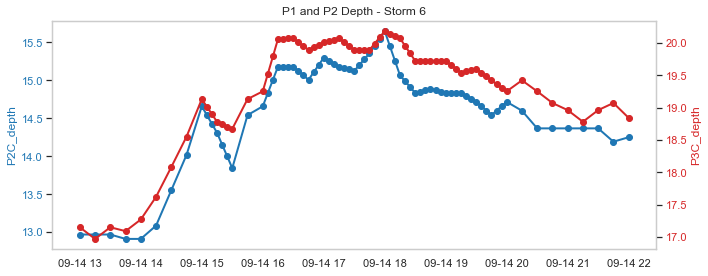

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:00:00


In [47]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 6')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)